## 2D CNN for Land Cover classification from Satellite Images using 
## Deep Learning Library

the implementation of the deep learning model, VGG16 for Add code cell ssification of Eurosat satellite images. 

The following are the steps involved in this process.

1. Import necessary libraries
2. Data reading and preparation
3. Create the deep learning(DL) model
4. Model Training
5. Floating Point operations and Trainable Parameter
6. Visualization of training accuracy and loss
7. Model Prediction on unseen data
8. Performance Evaluation

### 1. importing necessary libraries

In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import random
from glob import glob 
import fnmatch 
import collections
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras import backend as K 
from tensorflow.keras import regularizers 
from tensorflow.keras. layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model, Model
from tensorflow. keras import regularizers
from tensorflow.python.keras.utils import conv_utils
from tensorflow.keras import regularizers, constraints, initializers

2.16.1


### 2. Data reading and preparation

In [2]:
train_path = '/Users/gadeynagasrisaiaditya/Desktop/nitk intenship/summerintership/EuroSat_Custom/Train'
val_path = '/Users/gadeynagasrisaiaditya/Desktop/nitk intenship/summerintership/EuroSat_Custom/Val'
test_path = '/Users/gadeynagasrisaiaditya/Desktop/nitk intenship/summerintership/EuroSat_Custom/Test'

In [3]:
batch_size = 64
img_height = 64
img_width = 64
no_of_classes = 10

classes_name = [0,1,2,3,4,5,6,7,8,9]
input_shape = (img_height, img_width, 3)
tf. random.set_seed (1142)
random_seed = np.random.seed (1142)

In [4]:
#data argumentation
datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center = True,
    horizontal_flip = False,
    vertical_flip = False,
    featurewise_std_normalization = True,
    validation_split=0.2
    )

In [9]:
train_path = '/Users/gadeynagasrisaiaditya/Desktop/Aditya/nitk intenship/summerintership/EuroSat_Custom/Train'
val_path = '/Users/gadeynagasrisaiaditya/Desktop/Aditya/nitk intenship/summerintership/EuroSat_Custom/Val'

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width), 
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

print("Training classes")
print(train_generator.class_indices)
print("Training Labels")
print(train_generator.labels)
print("Validation classes")
print(validation_generator.class_indices)
print("Validation Labels")
print(validation_generator.labels)


Found 9080 images belonging to 10 classes.
Found 1599 images belonging to 10 classes.
Training classes
{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Training Labels
[0 0 0 ... 9 9 9]
Validation classes
{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation Labels
[0 0 0 ... 9 9 9]


In [10]:
print(train_generator[0])

(array([[[[0.13333334, 0.23529413, 0.3019608 ],
         [0.13725491, 0.2392157 , 0.29803923],
         [0.13725491, 0.2392157 , 0.2901961 ],
         ...,
         [0.14117648, 0.2509804 , 0.29411766],
         [0.12941177, 0.2392157 , 0.28627452],
         [0.1254902 , 0.227451  , 0.29411766]],

        [[0.13725491, 0.2392157 , 0.2901961 ],
         [0.14509805, 0.23529413, 0.2901961 ],
         [0.14509805, 0.23529413, 0.2901961 ],
         ...,
         [0.14509805, 0.24705884, 0.29803923],
         [0.13333334, 0.23529413, 0.29411766],
         [0.1254902 , 0.227451  , 0.29411766]],

        [[0.13725491, 0.24313727, 0.28627452],
         [0.14509805, 0.23529413, 0.2901961 ],
         [0.14117648, 0.23137257, 0.29411766],
         ...,
         [0.12941177, 0.21960786, 0.28235295],
         [0.13333334, 0.22352943, 0.28627452],
         [0.13725491, 0.227451  , 0.29803923]],

        ...,

        [[0.14901961, 0.25882354, 0.3019608 ],
         [0.15294118, 0.25882354, 0.3019608 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


### step:3 creating deep learning arechitecture :VGG16

In [11]:
def VGG16():
    input = tf.keras.layers.Input(shape=(64, 64, 3))
    
    conv1 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input)
    conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2))(conv2)
    
    conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv4 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool2 = tf.keras.layers.MaxPooling2D((2, 2))(conv4)
    
    conv5 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv6 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    conv7 = tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    pool3 = tf.keras.layers.MaxPooling2D((2, 2))(conv7)
    
    conv8 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv9 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
    conv10 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    pool4 = tf.keras.layers.MaxPooling2D((2, 2))(conv10)
    
    conv11 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv12 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv11)
    conv13 = tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv12)
    pool5 = tf.keras.layers.MaxPooling2D((2, 2))(conv13)
    
    global_pool = tf.keras.layers.GlobalAveragePooling2D()(pool5)
    
    dense1 = tf.keras.layers.Dense(2048, activation='relu')(global_pool)
    dense2 = tf.keras.layers.Dense(2048, activation='relu')(dense1)
    output = tf.keras.layers.Dense(10, activation='softmax')(dense2)  # Change the number of classes to 10
    
    model = tf.keras.models.Model(inputs=input, outputs=output)
    return model 

model = VGG16()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,982,154 (76.23 MB)

 Trainable params: 19,982,154 (76.23 MB)

 Non-trainable params: 0 (0.00 B)

4. Model Training

In [12]:
# Model Checkpoint
checkpoint_path = 'model_checkpoint.keras'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             mode='min', 
                             verbose=1)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               restore_best_weights=True, 
                               verbose=1)

# TensorBoard
log_dir = os.path.join('logs', 'fit', 'model_1')
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[checkpoint, early_stopping, tensorboard_callback]
)


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1856 - loss: 12.4545
Epoch 1: val_loss improved from inf to 1.69404, saving model to model_checkpoint.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.1860 - loss: 12.3962 - val_accuracy: 0.2819 - val_loss: 1.6940
Epoch 2/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 4:20 2s/step - accuracy: 0.3125 - loss: 1.5929

2024-08-06 13:16:50.429083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 1.69404


2024-08-06 13:16:50.949851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3125 - loss: 1.5929 - val_accuracy: 0.2063 - val_loss: 1.7695
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3607 - loss: 1.5776
Epoch 3: val_loss improved from 1.69404 to 1.43371, saving model to model_checkpoint.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.3608 - loss: 1.5774 - val_accuracy: 0.4232 - val_loss: 1.4337
Epoch 4/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 5:00 2s/step - accuracy: 0.3906 - loss: 1.4240

2024-08-06 13:22:12.147144: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss did not improve from 1.43371


2024-08-06 13:22:12.766585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3906 - loss: 1.4240 - val_accuracy: 0.4127 - val_loss: 1.6252
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3413 - loss: 1.7388
Epoch 5: val_loss did not improve from 1.43371
141/141 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.3414 - loss: 1.7382 - val_accuracy: 0.2845 - val_loss: 1.7301
Epoch 6/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 4:55 2s/step - accuracy: 0.3906 - loss: 1.7068

2024-08-06 13:27:47.934790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_loss did not improve from 1.43371


2024-08-06 13:27:48.527656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3906 - loss: 1.7068 - val_accuracy: 0.3810 - val_loss: 1.4714
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4215 - loss: 1.4365
Epoch 7: val_loss improved from 1.43371 to 1.36504, saving model to model_checkpoint.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.4215 - loss: 1.4366 - val_accuracy: 0.4681 - val_loss: 1.3650
Epoch 8/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 5:04 2s/step - accuracy: 0.4062 - loss: 1.3943

2024-08-06 13:33:28.258199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_loss did not improve from 1.36504


2024-08-06 13:33:28.879625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4062 - loss: 1.3943 - val_accuracy: 0.4762 - val_loss: 1.3840
Epoch 9/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4689 - loss: 1.3627
Epoch 9: val_loss improved from 1.36504 to 1.20951, saving model to model_checkpoint.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.4690 - loss: 1.3623 - val_accuracy: 0.5130 - val_loss: 1.2095
Epoch 10/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 5:09 2s/step - accuracy: 0.5156 - loss: 1.3703

2024-08-06 13:39:19.808537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_loss improved from 1.20951 to 1.18351, saving model to model_checkpoint.keras


2024-08-06 13:39:20.428674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5156 - loss: 1.3703 - val_accuracy: 0.4762 - val_loss: 1.1835
Epoch 11/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5391 - loss: 1.2056
Epoch 11: val_loss improved from 1.18351 to 1.12079, saving model to model_checkpoint.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.5391 - loss: 1.2055 - val_accuracy: 0.5794 - val_loss: 1.1208
Epoch 12/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 5:12 2s/step - accuracy: 0.6250 - loss: 1.0009

2024-08-06 13:45:10.948953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_loss improved from 1.12079 to 0.95736, saving model to model_checkpoint.keras


2024-08-06 13:45:11.572815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6250 - loss: 1.0009 - val_accuracy: 0.6667 - val_loss: 0.9574
Epoch 13/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5892 - loss: 1.0700
Epoch 13: val_loss did not improve from 0.95736
141/141 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.5893 - loss: 1.0699 - val_accuracy: 0.6419 - val_loss: 0.9583
Epoch 14/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 5:10 2s/step - accuracy: 0.5469 - loss: 1.2746

2024-08-06 13:50:59.423324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: val_loss improved from 0.95736 to 0.81118, saving model to model_checkpoint.keras


2024-08-06 13:51:00.052424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5469 - loss: 1.2746 - val_accuracy: 0.6825 - val_loss: 0.8112
Epoch 15/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6847 - loss: 0.8915
Epoch 15: val_loss did not improve from 0.81118
141/141 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.6847 - loss: 0.8915 - val_accuracy: 0.6465 - val_loss: 0.9664
Epoch 16/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 5:19 2s/step - accuracy: 0.5781 - loss: 1.1238

2024-08-06 13:56:52.370548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_loss did not improve from 0.81118


2024-08-06 13:56:52.995876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5781 - loss: 1.1238 - val_accuracy: 0.4762 - val_loss: 1.2569
Epoch 17/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.6709 - loss: 0.9057 
Epoch 17: val_loss improved from 0.81118 to 0.78280, saving model to model_checkpoint.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 4250s 30s/step - accuracy: 0.6711 - loss: 0.9051 - val_accuracy: 0.7201 - val_loss: 0.7828
Epoch 18/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 4:55 2s/step - accuracy: 0.6719 - loss: 0.8384

2024-08-06 15:07:46.367993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 18: val_loss improved from 0.78280 to 0.70549, saving model to model_checkpoint.keras


2024-08-06 15:07:46.931473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6719 - loss: 0.8384 - val_accuracy: 0.7778 - val_loss: 0.7055
Epoch 19/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7409 - loss: 0.7381
Epoch 19: val_loss did not improve from 0.70549
141/141 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.7409 - loss: 0.7380 - val_accuracy: 0.7233 - val_loss: 0.7550
Epoch 20/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 4:27 2s/step - accuracy: 0.7656 - loss: 0.6825

2024-08-06 15:12:39.295727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 20: val_loss did not improve from 0.70549


2024-08-06 15:12:39.838606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7656 - loss: 0.6825 - val_accuracy: 0.7460 - val_loss: 0.7814
Epoch 21/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6868 - loss: 0.8860
Epoch 21: val_loss did not improve from 0.70549
141/141 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.6870 - loss: 0.8856 - val_accuracy: 0.7259 - val_loss: 0.7736
Epoch 22/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 4:30 2s/step - accuracy: 0.7188 - loss: 0.6683

2024-08-06 15:17:41.818511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 22: val_loss did not improve from 0.70549


2024-08-06 15:17:42.351146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7188 - loss: 0.6683 - val_accuracy: 0.6190 - val_loss: 0.9373
Epoch 23/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7687 - loss: 0.6543
Epoch 23: val_loss did not improve from 0.70549
141/141 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.7685 - loss: 0.6552 - val_accuracy: 0.6185 - val_loss: 0.9975
Epoch 24/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 4:25 2s/step - accuracy: 0.5938 - loss: 1.0803

2024-08-06 15:22:46.519391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 24: val_loss did not improve from 0.70549


2024-08-06 15:22:47.054719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5938 - loss: 1.0803 - val_accuracy: 0.6825 - val_loss: 0.9786
Epoch 25/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6902 - loss: 0.8467
Epoch 25: val_loss did not improve from 0.70549
141/141 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.6904 - loss: 0.8462 - val_accuracy: 0.7214 - val_loss: 0.7460
Epoch 26/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 4:46 2s/step - accuracy: 0.8594 - loss: 0.4705

2024-08-06 15:27:58.804663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 26: val_loss did not improve from 0.70549


2024-08-06 15:27:59.372506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8594 - loss: 0.4705 - val_accuracy: 0.6667 - val_loss: 0.9683
Epoch 27/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7738 - loss: 0.6460
Epoch 27: val_loss did not improve from 0.70549
141/141 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.7738 - loss: 0.6460 - val_accuracy: 0.7285 - val_loss: 0.7581
Epoch 28/50
  1/141 ━━━━━━━━━━━━━━━━━━━━ 5:03 2s/step - accuracy: 0.7500 - loss: 0.5889

2024-08-06 15:33:11.194868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 28: val_loss did not improve from 0.70549


2024-08-06 15:33:11.831525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7500 - loss: 0.5889 - val_accuracy: 0.6508 - val_loss: 0.7819
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 18.


5. Floating Point Operations and Trainable Parameters

In [14]:
# Import necessary libraries
from tensorflow.keras.utils import plot_model
from tensorflow.python.framework import convert_to_constants
import numpy as np
import tensorflow as tf

def get_flops(model):
    concrete = tf.function(lambda inputs: model(inputs))
    concrete_func = concrete.get_concrete_function(tf.TensorSpec([1] + list(input_shape)))

    frozen_func, graph_def = convert_to_constants.convert_variables_to_constants_v2_as_graph(concrete_func)

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()

        flops = tf.compat.v1.profiler.profile(graph=graph,
                                              run_meta=run_meta,
                                              cmd="op",
                                              options=opts)
        return flops.total_float_ops

flops = get_flops(model)
print(f"Floating point operations: {flops}")

# Trainable parameters
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
print(f"Trainable parameters: {trainable_params}")


2024-08-06 15:39:02.591704: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-08-06 15:39:02.591776: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.

=========================Options=============================
Floating point operations: 2517710908
Trainable parameters: 19982154
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analys

6. Visualization of Training Accuracy and Loss

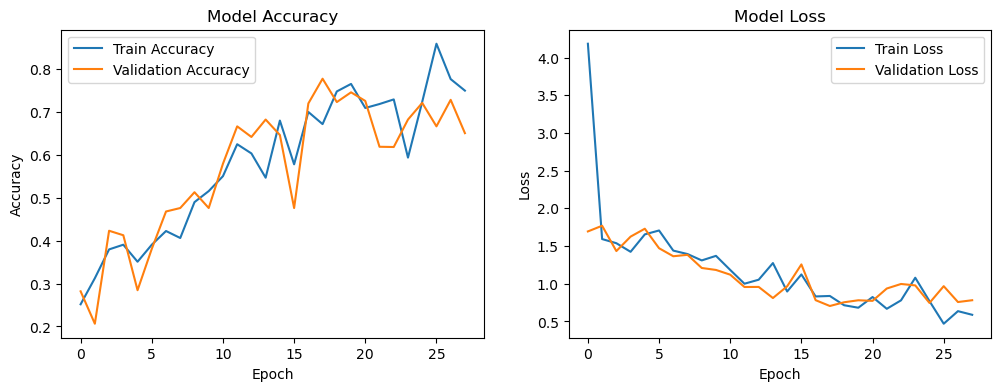

In [15]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


7. Model Prediction on Unseen Data

In [21]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the test path
test_path = "/Users/gadeynagasrisaiaditya/Desktop/Aditya/nitk intenship/summerintership/EuroSat_Custom/Test"

# Print the path to verify
print("Test Path:", test_path)

# Check if the directory exists
if not os.path.exists(test_path):
    raise FileNotFoundError(f"Directory {test_path} does not exist.")

# List the contents of the parent directory
parent_dir = os.path.dirname(test_path)
print("Parent Directory Contents:", os.listdir(parent_dir))

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


Test Path: /Users/gadeynagasrisaiaditya/Desktop/Aditya/nitk intenship/summerintership/EuroSat_Custom/Test
Parent Directory Contents: ['.DS_Store', 'Test', 'Train', 'Val']
Found 1440 images belonging to 10 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step


8. Performance Evaluation

Classification Report:
                       precision    recall  f1-score   support

          AnnualCrop       0.69      0.89      0.78       144
              Forest       0.72      0.90      0.80       144
HerbaceousVegetation       0.67      0.47      0.55       144
             Highway       0.77      0.69      0.73       144
          Industrial       0.96      0.90      0.93       144
             Pasture       0.56      0.63      0.59       144
       PermanentCrop       0.60      0.65      0.62       144
         Residential       0.80      0.96      0.87       144
               River       0.75      0.51      0.61       144
             SeaLake       0.96      0.82      0.88       144

            accuracy                           0.74      1440
           macro avg       0.75      0.74      0.74      1440
        weighted avg       0.75      0.74      0.74      1440



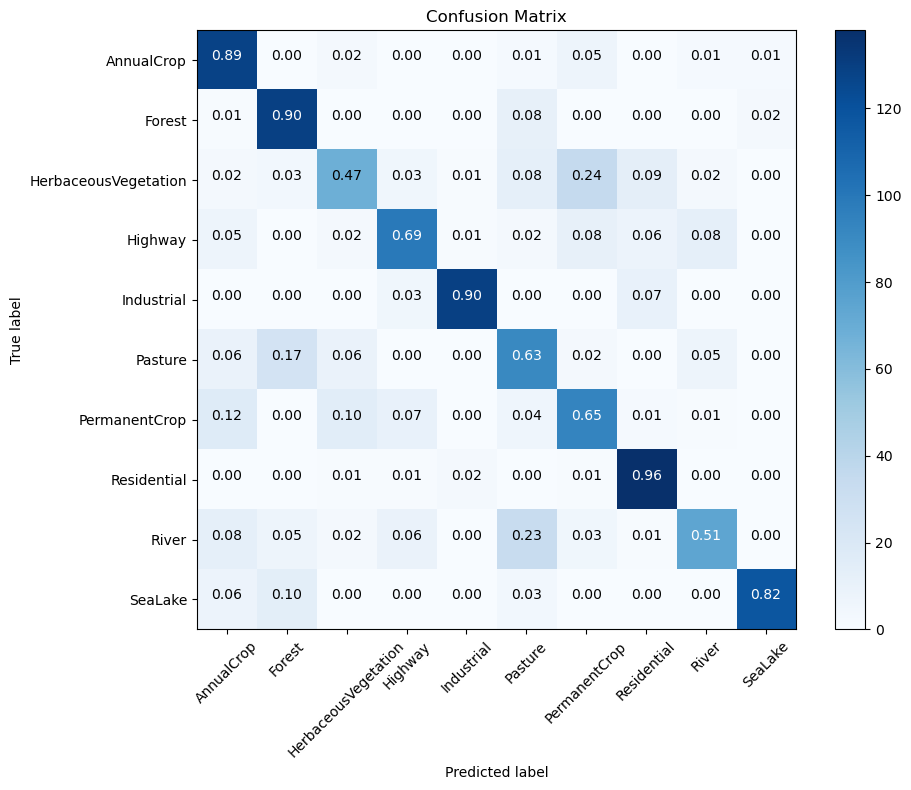

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools  # Import itertools module

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Normalize the confusion matrix
cm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
